In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.externals import joblib 

In [2]:
data = pd.read_csv("pid-5M.csv")

In [37]:
data.drop('id', axis=1).head()

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
id       int64
p        float64
theta    float64
beta     float64
nphe     int64
ein      float64
eout     float64
dtypes: float64(5), int64(2)
memory usage: 267.0 MB


In [5]:
data.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


In [6]:
training_data, test_data = train_test_split(data, random_state=42, test_size=0.2)

In [10]:
tdata = training_data.copy()

### Visualising the Data

In [9]:
corr = tdata.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,p,theta,beta,nphe,ein,eout
id,1,0.246778,-0.300644,-0.72898,-0.0701164,0.195664,0.191772
p,0.246778,1,-0.568535,0.22703,-0.0802463,0.413222,0.547047
theta,-0.300644,-0.568535,1,0.0183787,0.0395051,-0.369932,-0.381207
beta,-0.72898,0.22703,0.0183787,1,0.0172253,-0.00892324,0.115942
nphe,-0.0701164,-0.0802463,0.0395051,0.0172253,1,-0.0205928,-0.0399411
ein,0.195664,0.413222,-0.369932,-0.00892324,-0.0205928,1,0.288058
eout,0.191772,0.547047,-0.381207,0.115942,-0.0399411,0.288058,1


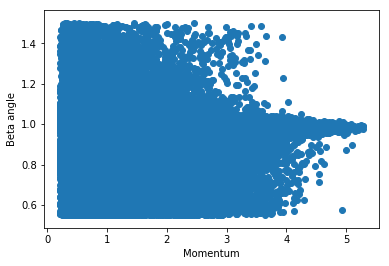

In [10]:
plt.scatter(tdata['p'], tdata['beta'])
plt.xlabel('Momentum')
plt.ylabel('Beta angle')
plt.show()

/Users/Ameya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Momentum Distribution')

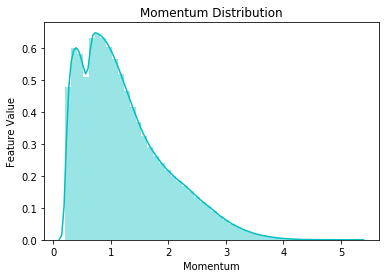

In [139]:
sns.distplot(data['p'], hist=True, kde=True, color='c')
plt.xlabel('Momentum')
plt.ylabel('Feature Value')
plt.title('Momentum Distribution')

In [14]:
tdata.isnull().sum()

id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

In [11]:
X_train = training_data.drop('id', axis=1)
y_train = training_data['id']

In [12]:
X_test = test_data.drop('id', axis=1)
y_test = test_data['id']

### Stochastic Gradient Classifier

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', penalty='elasticnet')

In [14]:
sgd_clf.fit(X_train, y_train)

/Users/Ameya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
print(classification_report(y_test, sgd_clf.predict(X_test), digits=3))

/Users/Ameya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         -11      0.000     0.000     0.000      3026
         211      0.939     0.969     0.954    561856
         321      0.000     0.000     0.000     46373
        2212      0.918     0.992     0.954    388745

   micro avg      0.930     0.930     0.930   1000000
   macro avg      0.464     0.490     0.477   1000000
weighted avg      0.885     0.930     0.907   1000000



In [16]:
print(accuracy_score(y_test, sgd_clf.predict(X_test)))

0.930263


### AdaBoost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

In [28]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [30]:
print(classification_report(y_test, ada_clf.predict(X_test), digits=3))

              precision    recall  f1-score   support

         -11      0.115     0.424     0.180      3026
         211      0.943     0.970     0.956    561856
         321      0.842     0.298     0.440     46373
        2212      0.972     0.987     0.979    388745

   micro avg      0.943     0.943     0.943   1000000
   macro avg      0.718     0.669     0.639   1000000
weighted avg      0.947     0.943     0.939   1000000



In [31]:
print(accuracy_score(y_test, ada_clf.predict(X_test)))

0.943385


### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)

In [33]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
print(classification_report(y_test, tree_clf.predict(X_test), digits=3))

              precision    recall  f1-score   support

         -11      0.743     0.180     0.290      3026
         211      0.960     0.982     0.971    561856
         321      0.747     0.476     0.582     46373
        2212      0.967     0.983     0.975    388745

   micro avg      0.956     0.956     0.956   1000000
   macro avg      0.854     0.655     0.704   1000000
weighted avg      0.952     0.956     0.952   1000000



In [35]:
print(accuracy_score(y_test, tree_clf.predict(X_test)))

0.956471


### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [19]:
rf_clf.fit(X_train, y_train)

/Users/Ameya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print(classification_report(y_test, rf_clf.predict(X_test), digits=3))

              precision    recall  f1-score   support

         -11      0.806     0.651     0.721      3026
         211      0.974     0.981     0.977    561856
         321      0.791     0.700     0.743     46373
        2212      0.985     0.989     0.987    388745

   micro avg      0.970     0.970     0.970   1000000
   macro avg      0.889     0.830     0.857   1000000
weighted avg      0.969     0.970     0.969   1000000



In [21]:
print(accuracy_score(y_test, rf_clf.predict(X_test)))

0.97003


### Saving the Best Model

In [34]:
best_model = rf_clf

In [136]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']